In [1]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
100% 609M/612M [00:06<00:00, 162MB/s]
100% 612M/612M [00:06<00:00, 93.9MB/s]


In [2]:
!unzip gtsrb-german-traffic-sign.zip -d gtsrb-german-traffic-sign

Streaming output truncated to the last 5000 lines.
  inflating: gtsrb-german-traffic-sign/train/5/00005_00053_00010.png  
  inflating: gtsrb-german-traffic-sign/train/5/00005_00053_00011.png  
  inflating: gtsrb-german-traffic-sign/train/5/00005_00053_00012.png  
  inflating: gtsrb-german-traffic-sign/train/5/00005_00053_00013.png  
  inflating: gtsrb-german-traffic-sign/train/5/00005_00053_00014.png  
  inflating: gtsrb-german-traffic-sign/train/5/00005_00053_00015.png  
  inflating: gtsrb-german-traffic-sign/train/5/00005_00053_00016.png  
  inflating: gtsrb-german-traffic-sign/train/5/00005_00053_00017.png  
  inflating: gtsrb-german-traffic-sign/train/5/00005_00053_00018.png  
  inflating: gtsrb-german-traffic-sign/train/5/00005_00053_00019.png  
  inflating: gtsrb-german-traffic-sign/train/5/00005_00053_00020.png  
  inflating: gtsrb-german-traffic-sign/train/5/00005_00053_00021.png  
  inflating: gtsrb-german-traffic-sign/train/5/00005_00053_00022.png  
  inflating: gtsrb-german-

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
import os
import cv2
import pathlib
import PIL
import random


In [4]:
train_data_dir = pathlib.Path('/content/gtsrb-german-traffic-sign/Train')

In [6]:
num_classes = len(list(train_data_dir.glob('*')))
print(num_classes)

43


In [7]:
train_data_count = len(list(train_data_dir.glob('*/*.png')))
train_data_count

39209

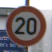

In [42]:
category_0 = list(train_data_dir.glob('0/*'))
PIL.Image.open(category_0[0])

In [9]:
dir = os.listdir(train_data_dir)
print(dir)

['41', '8', '29', '4', '14', '40', '13', '23', '11', '7', '9', '24', '36', '30', '28', '19', '37', '3', '18', '20', '26', '6', '35', '2', '17', '5', '31', '34', '16', '1', '27', '32', '0', '39', '33', '10', '15', '21', '42', '22', '12', '38', '25']


**Labels Dictionary**

In [10]:
labels = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

## Visualizing training Data

In [14]:
training_examples_perclass = []
class_names = []
train_images = []
for folder in os.listdir(train_data_dir):
  folder_path = train_data_dir / folder
  images = list(folder_path.glob('*'))
  training_examples_perclass.append(len(images))
  class_names.append(labels[int(folder)])

In [15]:
print(training_examples_perclass)
print(class_names)
sum(training_examples_perclass)

[240, 1410, 270, 1980, 780, 360, 2160, 510, 1320, 1440, 1470, 270, 390, 450, 540, 210, 210, 1410, 1200, 360, 600, 420, 1200, 2250, 1110, 1860, 780, 420, 420, 2220, 240, 240, 210, 300, 689, 2010, 630, 330, 240, 390, 2100, 2070, 1500]
['End of no passing', 'Speed limit (120km/h)', 'Bicycles crossing', 'Speed limit (70km/h)', 'Stop', 'Roundabout mandatory', 'Yield', 'Slippery road', 'Right-of-way at intersection', 'Speed limit (100km/h)', 'No passing', 'Road narrows on the right', 'Go straight or right', 'Beware of ice/snow', 'Children crossing', 'Dangerous curve left', 'Go straight or left', 'Speed limit (60km/h)', 'General caution', 'Dangerous curve right', 'Traffic signals', 'End of speed limit (80km/h)', 'Ahead only', 'Speed limit (50km/h)', 'No entry', 'Speed limit (80km/h)', 'Wild animals crossing', 'Turn left ahead', 'Veh > 3.5 tons prohibited', 'Speed limit (30km/h)', 'Pedestrians', 'End speed + passing limits', 'Speed limit (20km/h)', 'Keep left', 'Turn right ahead', 'No passing 

39209

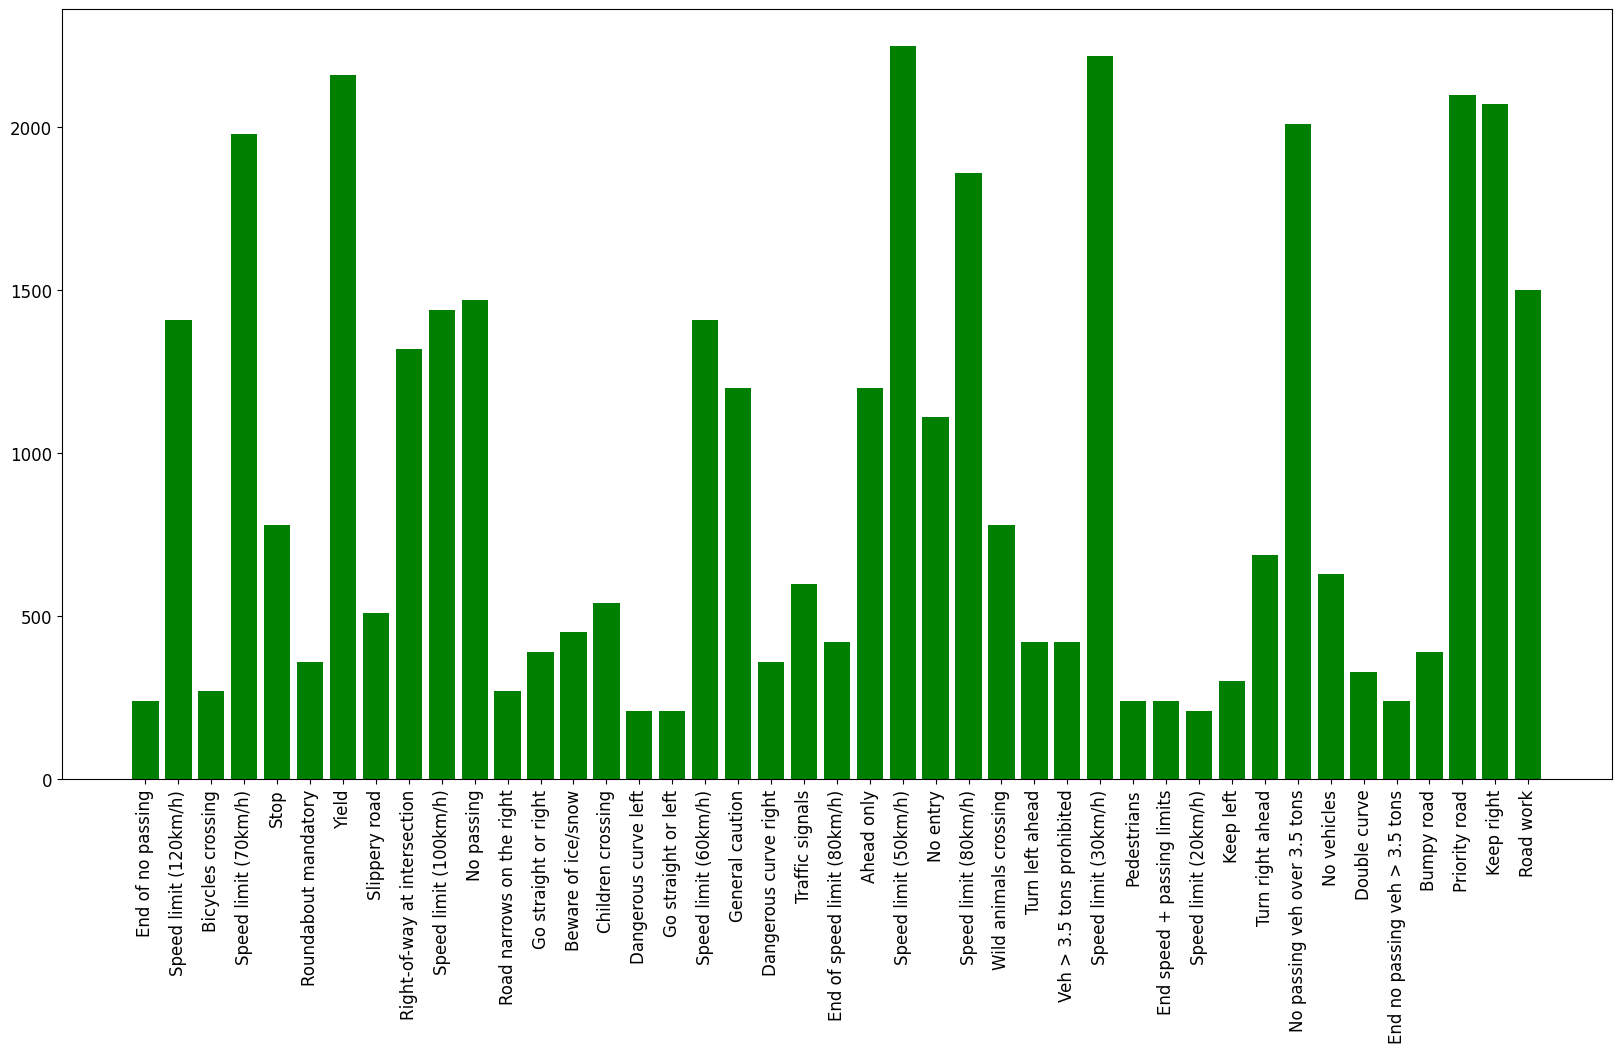

In [16]:
plt.figure(figsize=(20,10))
plt.bar(class_names, training_examples_perclass, color='green')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [53]:
# displaying random images from training set
def random_image_displayer(directory,num_images):
  images = []
  classes = [dir for dir in directory.iterdir() if dir.is_dir()]
  if len(classes)!= 0:
    for folder in classes:
      images.extend(list(folder.glob('*')))
  else:
    images.extend(list(directory.glob('*')))
  random_images = random.sample(images, num_images)
  columns = (num_images+1)//2
  plt.figure(figsize=(10,5))
  for i, img_path in enumerate(random_images):
    img = cv2.imread(str(img_path))
    img = cv2.resize(img, (52,52))
    plt.subplot(2, columns, i + 1)
    plt.imshow(img)
    if len(classes) != 0:
       plt.title(f'Class:{img_path.parent.name}', fontsize=7)
       plt.text(
            0.5, -0.1, f"{labels[int(img_path.parent.name)]}",
            size=7, ha='center', transform=plt.gca().transAxes
        )
    plt.axis('off')
  plt.show()



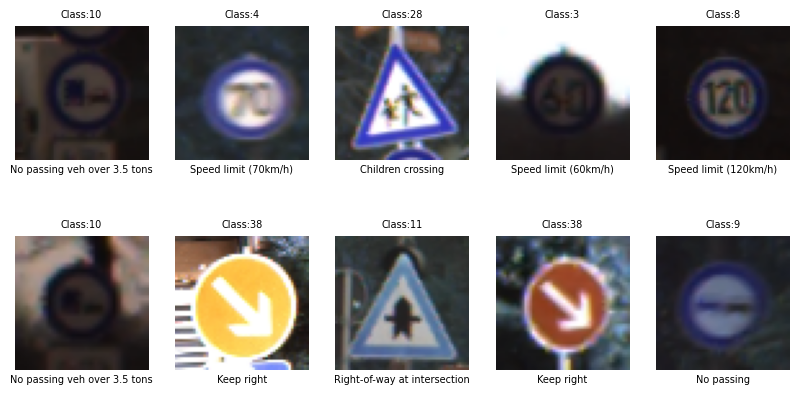

In [54]:
random_image_displayer(train_data_dir, 10)

In [60]:
train_images = []
train_labels = []
for folder in os.listdir(train_data_dir):
  folder_path = train_data_dir / folder
  images = list(folder_path.glob('*'))
  for img_path in images:
    img = cv2.imread(str(img_path))
    img = cv2.resize(img, (30,30))
    train_images.append(img)
    train_labels.append(int(folder))


In [61]:
X = np.array(train_images)
y = np.array(train_labels)


In [66]:
X_train, X_val, y_train, y_val = train_test_split(X , y, test_size = 0.3, shuffle=True, random_state=42)

In [67]:
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(27446, 30, 30, 3) (11763, 30, 30, 3) (27446,) (11763,)


In [68]:
X_train_scaled = X_train / 255.0
X_val_scaled = X_val / 255.0

In [69]:
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

## CNN Model

In [70]:
model = models.Sequential([
    #cnn
    layers.Conv2D(32, (5,5), activation ='relu', input_shape=(30,30,3)),
    layers.Conv2D(32, (5,5), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    #dense
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [72]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
history = model.fit(X_train_scaled, y_train, epochs=15, validation_data=(X_val_scaled, y_val))

Epoch 1/15
858/858 [==============================] - 120s 140ms/step - loss: 0.8785 - accuracy: 0.7456 - val_loss: 0.1635 - val_accuracy: 0.9613
Epoch 2/15
858/858 [==============================] - 127s 149ms/step - loss: 0.2519 - accuracy: 0.9235 - val_loss: 0.0837 - val_accuracy: 0.9787
Epoch 3/15
858/858 [==============================] - 132s 154ms/step - loss: 0.1597 - accuracy: 0.9503 - val_loss: 0.0473 - val_accuracy: 0.9875
Epoch 4/15
858/858 [==============================] - 129s 150ms/step - loss: 0.1245 - accuracy: 0.9615 - val_loss: 0.0328 - val_accuracy: 0.9917
Epoch 5/15
858/858 [==============================] - 128s 150ms/step - loss: 0.1018 - accuracy: 0.9693 - val_loss: 0.0443 - val_accuracy: 0.9879
Epoch 6/15
858/858 [==============================] - 122s 143ms/step - loss: 0.0902 - accuracy: 0.9728 - val_loss: 0.0302 - val_accuracy: 0.9934
Epoch 7/15
858/858 [==============================] - 126s 147ms/step - loss: 0.0810 - accuracy: 0.9747 - val_loss: 0.0283 -

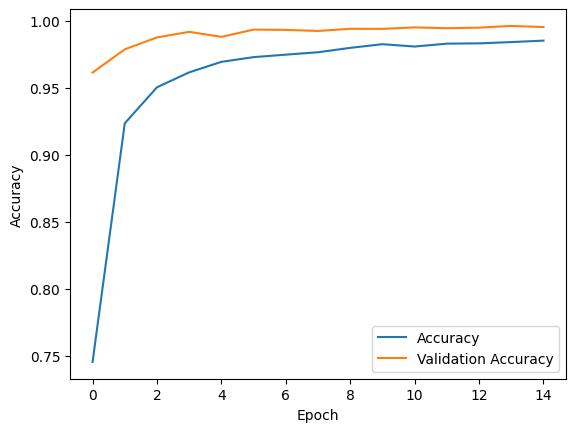

In [75]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(["Accuracy","Validation Accuracy"])

## Evaluating on Test Data

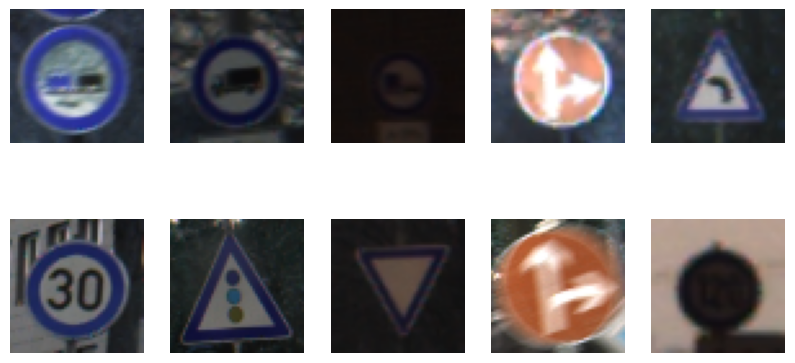

In [98]:
test_data_dir = pathlib.Path('/content/gtsrb-german-traffic-sign/Test')
random_image_displayer(test_data_dir, 10)
#displaying random images from test data

In [76]:
test_data = pd.read_csv('/content/gtsrb-german-traffic-sign/Test.csv')

In [77]:
test_data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [78]:
test_images = test_data['Path'].values
test_labels = test_data['ClassId'].values

In [82]:
test_images[0]

'Test/00000.png'

In [83]:

X_test = []
for image in test_images:
  img  = cv2.imread('/content/gtsrb-german-traffic-sign'+'/'+image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  resized_image = cv2.resize(img, (30,30))
  X_test.append(resized_image)

In [84]:
X_test = np.array(X_test)

In [87]:
y_test = test_labels

In [90]:
X_test_scaled = X_test / 255.0

In [92]:
y_pred = model.predict(X_test_scaled)

395/395 [==============================] - 24s 59ms/step


In [93]:
final_pred = np.argmax(y_pred, axis=1)

In [94]:
accuracy_score(y_test,final_pred)

0.7844022169437846

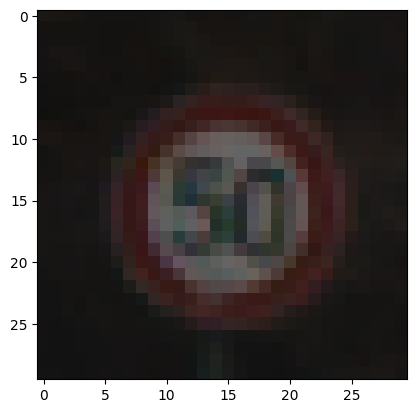

In [101]:
plt.imshow(X_test[67])

In [97]:
labels[final_pred[67]]

'Speed limit (50km/h)'

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        60
           1       0.84      0.98      0.90       720
           2       0.95      0.98      0.96       750
           3       0.62      0.93      0.74       450
           4       0.96      0.95      0.96       660
           5       0.88      0.92      0.90       630
           6       1.00      0.80      0.89       150
           7       0.95      0.93      0.94       450
           8       0.97      0.91      0.94       450
           9       0.89      0.99      0.94       480
          10       0.92      0.97      0.95       660
          11       0.94      0.98      0.96       420
          12       0.40      0.26      0.31       690
          13       0.77      1.00      0.87       720
          14       0.25      0.12      0.16       270
          15       0.95      0.18      0.30       210
          16       0.96      0.99      0.98       150
          17       0.75    

In [103]:
model.save('traffic.keras')